## Дипломный проект
#### Капустин Яромир

- v.1.0
- 19.05.2023

##### Задача:

Обучить модели распознавания объектов на основе фреймворков yolov7 и yolov8 с использованием архитектур похожей вычислительной сложности и составить их рейтинг по эффективности относительно их времени выполнения.

##### Набор данных:

PlantDoc — это набор данных Roboflow из 2569 изображений 13 видов растений и 30 классов (больных и здоровых) для классификации изображений и обнаружения объектов c 8851 ярлыками.



Модели yolov7 и yolov8 обучены на датасете PlantDoc и хорошо справляются с распознаванием изображений. Были выбраны вариации моделей yolov7x и yolov8n, обладающие схожей вычислительной способностью. Метрикой точности является AP (Average precision) – это популярная метрика измерения точности детекторов объектов. Average Precision вычисляет среднюю точность для recall в диапазоне от 0 до 1.

##### Вывод:

Модель yolov8n справляется с детекцией изображений лучше модель yolov7x: mAP50 0.6254 против 0.4932; время выполнения 30 минут у yolov8 против yolov7, у которой 2 часа 15 минут.


In [1]:
#импорты
import torch
from ultralytics import YOLO
import os
from IPython.display import display, Image
import pandas as pd

In [2]:
#проверка GPU
torch.cuda.is_available()

True

### YOLOV7

In [6]:
os.chdir(r'C:\Users\Yaromir\Desktop\dipv\yolov7')

In [7]:
#обучение модели
%%time
!python train.py --device 0 --batch-size 16 --epochs 100 --data data/data.yaml --img 416 --cfg cfg/training/yolov7.yaml --weights yolov7x.pt

wandb: Install Weights & Biases for YOLOR logging with 'pip install wandb' (recommended)CPU times: total: 438 ms
Wall time: 2h 14min 56s


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





autoanchor: Analyzing anchors... anchors/target = 5.21, Best Possible Recall (BPR) = 0.9999
                 all         239         454       0.113      0.0139    0.000249    9.94e-05
                 all         239         454     0.00664      0.0037    0.000707    0.000424
                 all         239         454    0.000549      0.0037    0.000303    3.93e-05
                 all         239         454    0.000623       0.075     0.00392     0.00142
                 all         239         454    0.000807      0.0802    0.000592    0.000187
                 all         239         454     0.00659      0.0612     0.00774     0.00134
                 all         239         454       0.043      0.0729     0.00704     0.00172
                 all         239         454       0.308      0.0633      0.0131      0.0042
                 all         239         454       0.507      0.0885      0.0451      0.0256
                 all         239         454       0.443      0.0985 

     92/99     5.62G    0.0323   0.01953   0.02431   0.07614       162       416:  82%|########1 | 119/146 [01:02<00:14,  1.89it/s]
     92/99     5.62G    0.0323   0.01957   0.02425   0.07613       185       416:  82%|########1 | 119/146 [01:02<00:14,  1.89it/s]
     92/99     5.62G    0.0323   0.01957   0.02425   0.07613       185       416:  82%|########2 | 120/146 [01:02<00:13,  1.89it/s]
     92/99     5.62G   0.03233    0.0196   0.02424   0.07617       127       416:  82%|########2 | 120/146 [01:03<00:13,  1.89it/s]
     92/99     5.62G   0.03233    0.0196   0.02424   0.07617       127       416:  83%|########2 | 121/146 [01:03<00:13,  1.86it/s]
     92/99     5.62G    0.0323   0.01959   0.02425   0.07614       101       416:  83%|########2 | 121/146 [01:03<00:13,  1.86it/s]
     92/99     5.62G    0.0323   0.01959   0.02425   0.07614       101       416:  84%|########3 | 122/146 [01:03<00:12,  1.91it/s]
     92/99     5.62G   0.03229   0.01956   0.02429   0.07614       117      

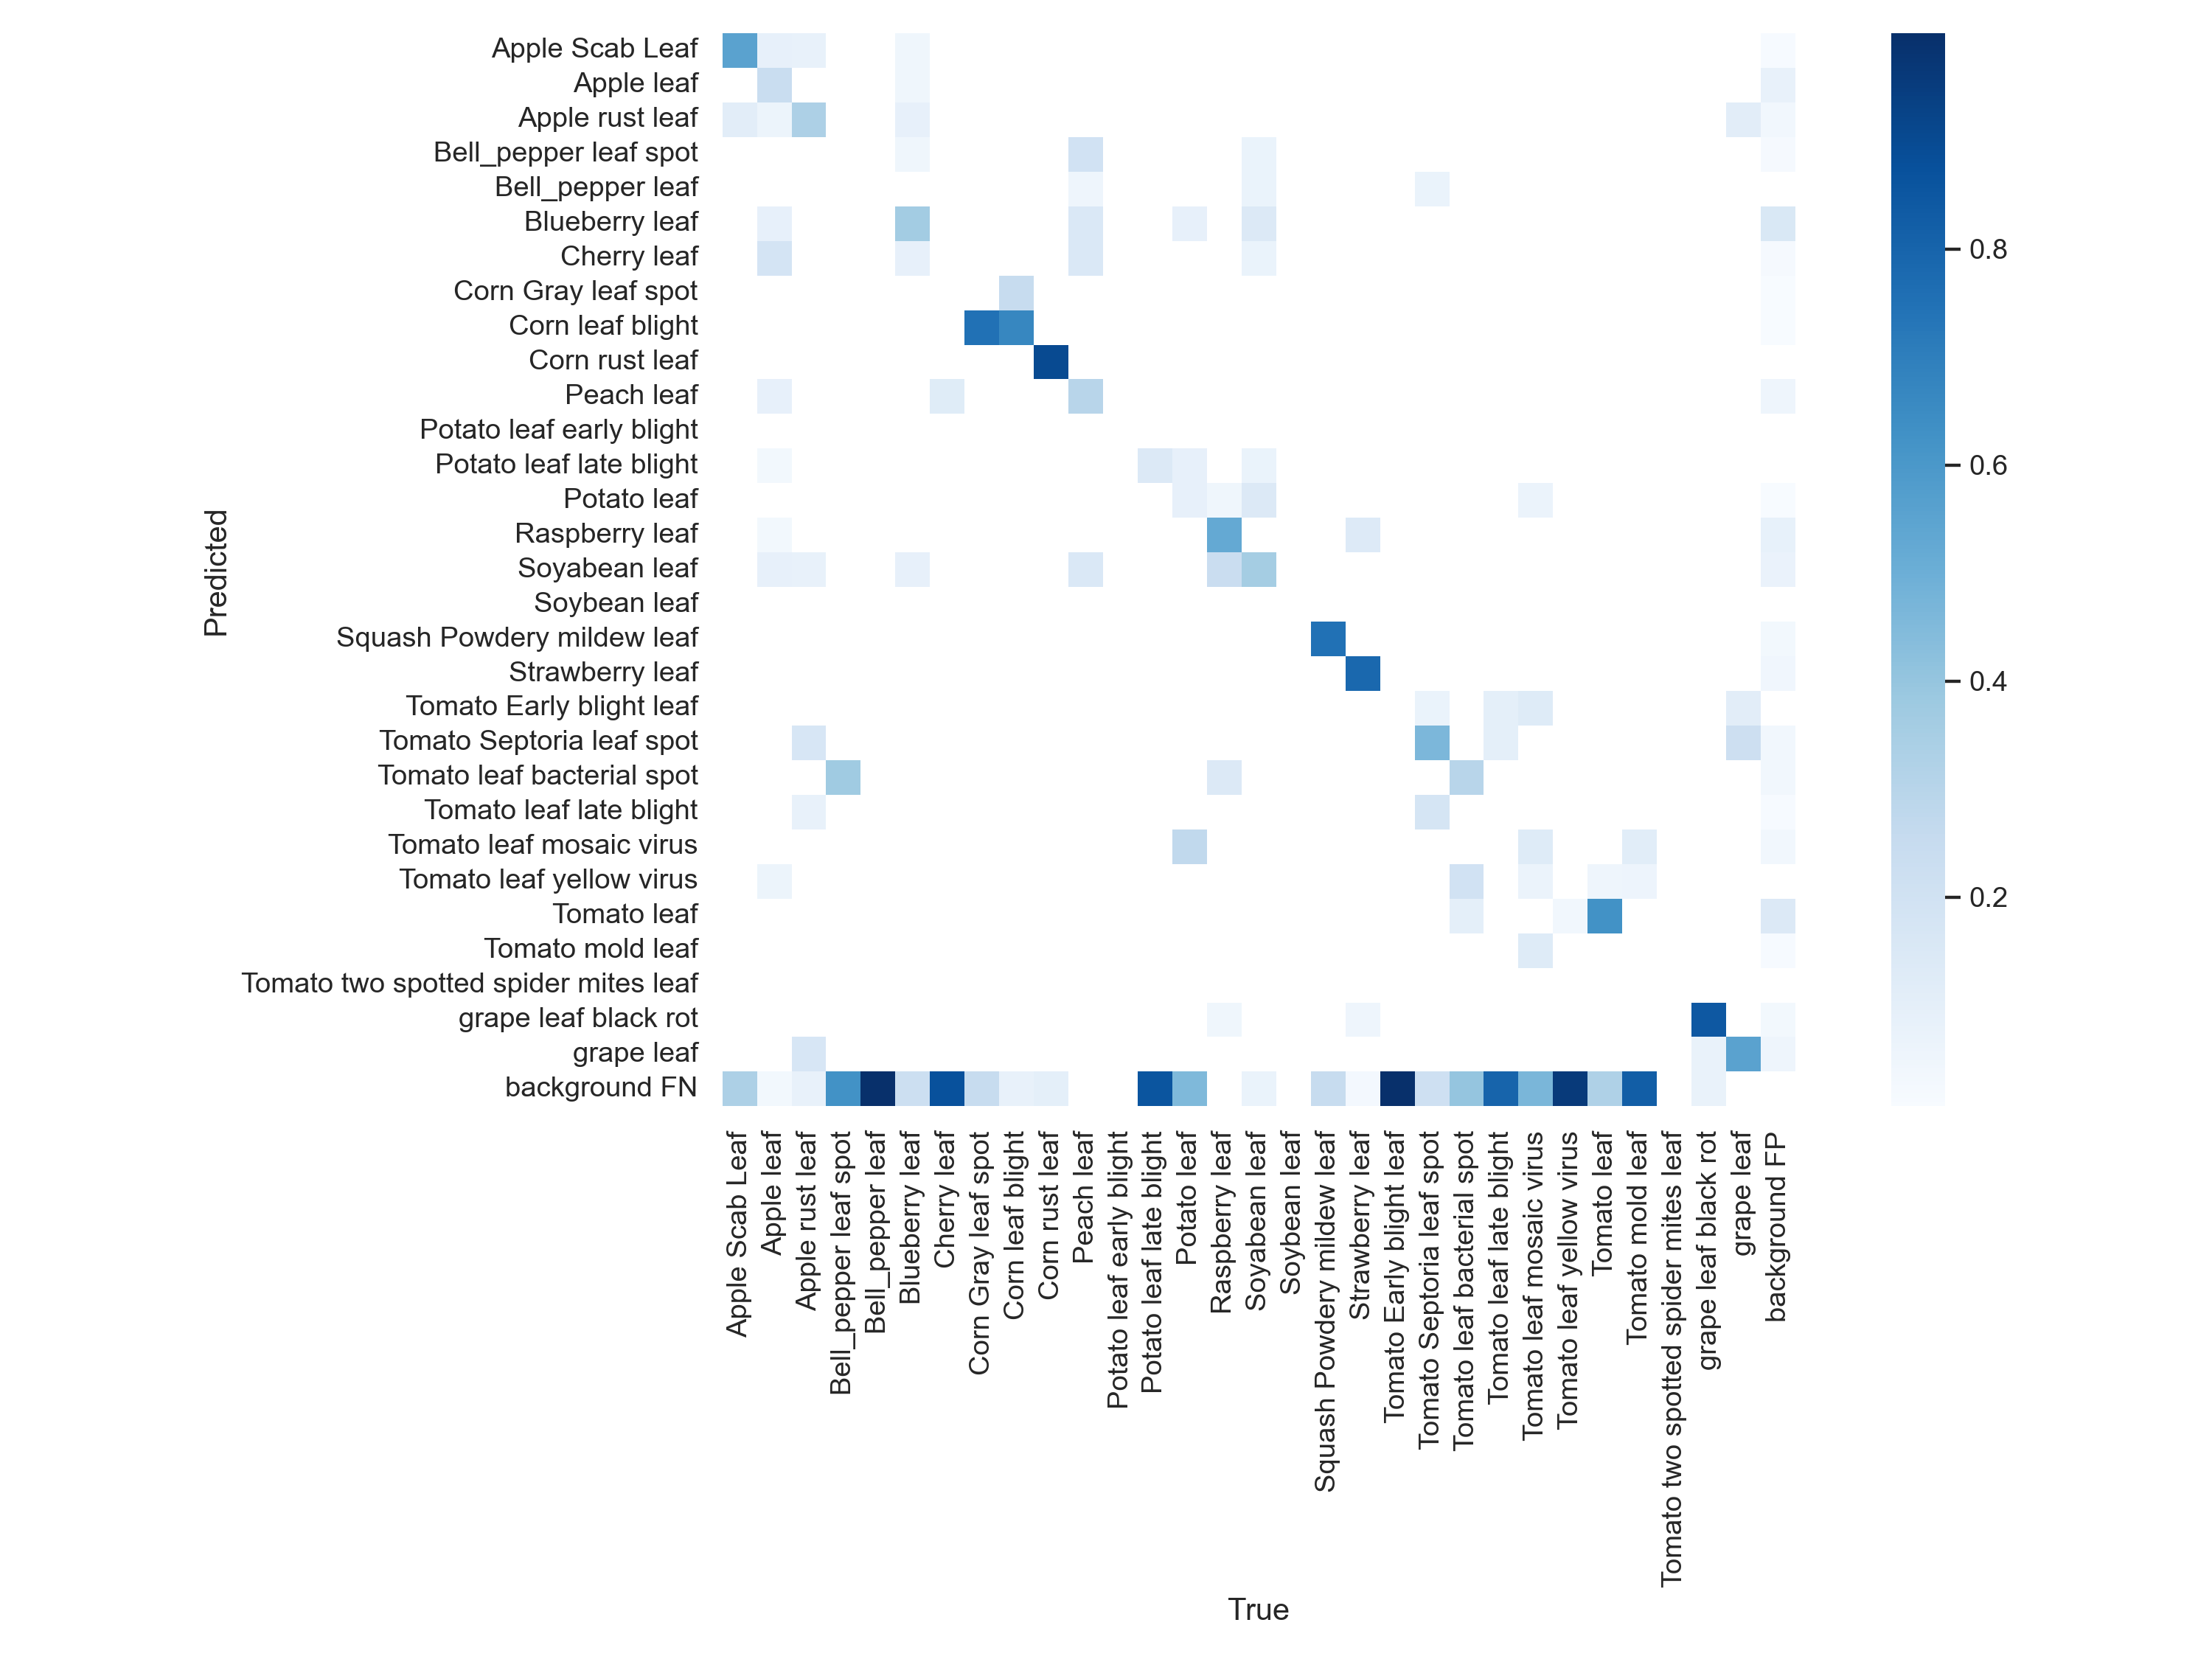

In [27]:
Image(filename=r'C:\Users\Yaromir\Desktop\dipv\yolov7\runs\train\exp\confusion_matrix.png', width=1600)

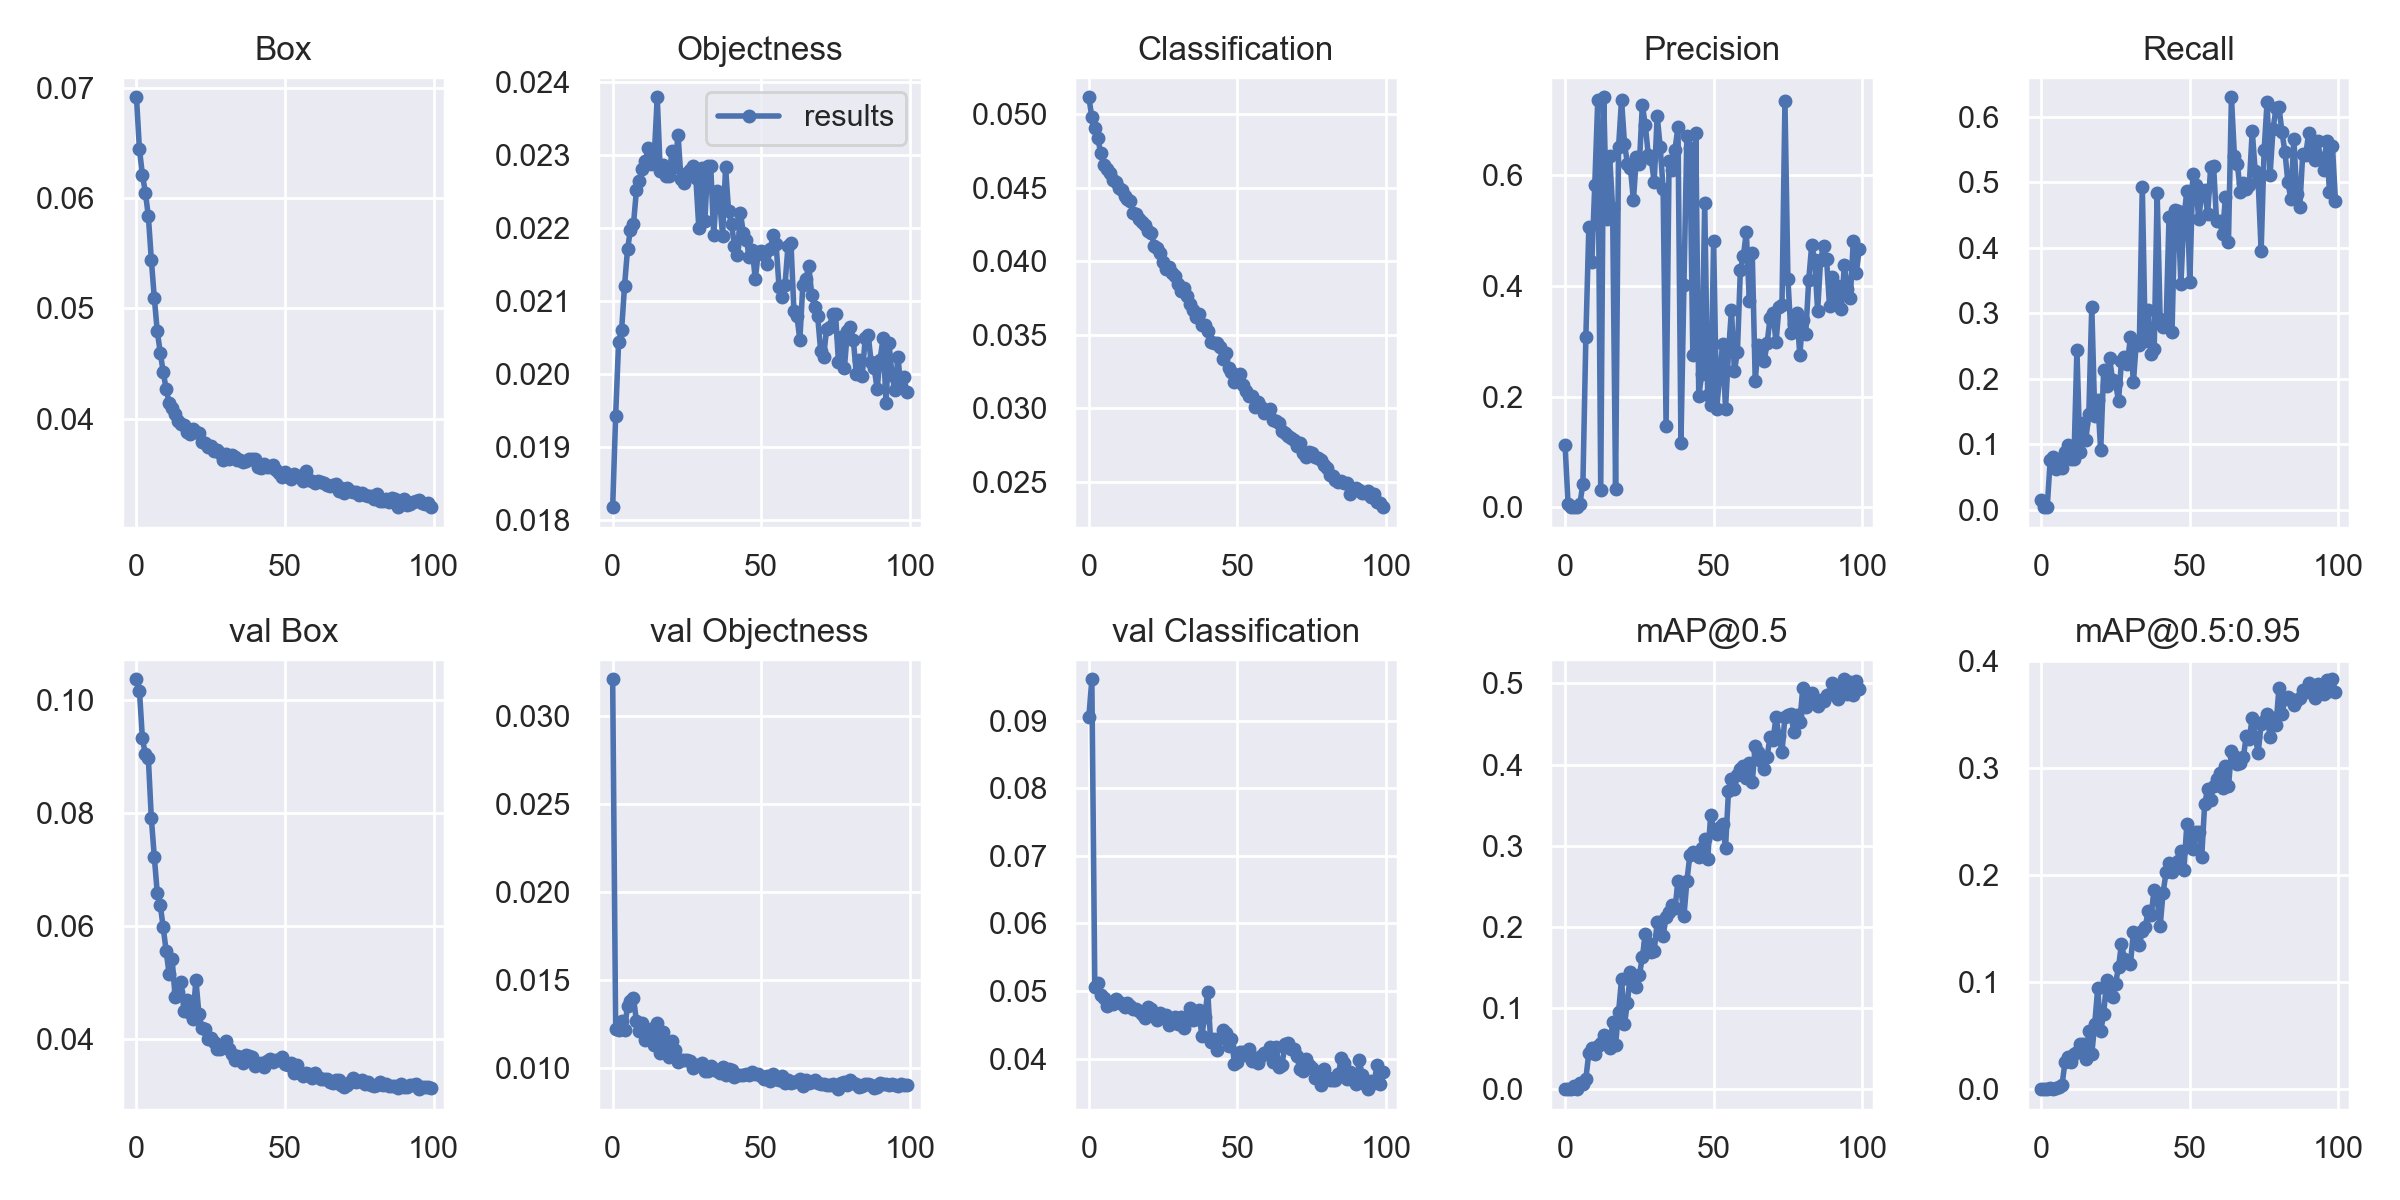

In [28]:
Image(filename=r'C:\Users\Yaromir\Desktop\dipv\yolov7\runs\train\exp\results.png', width=1600)

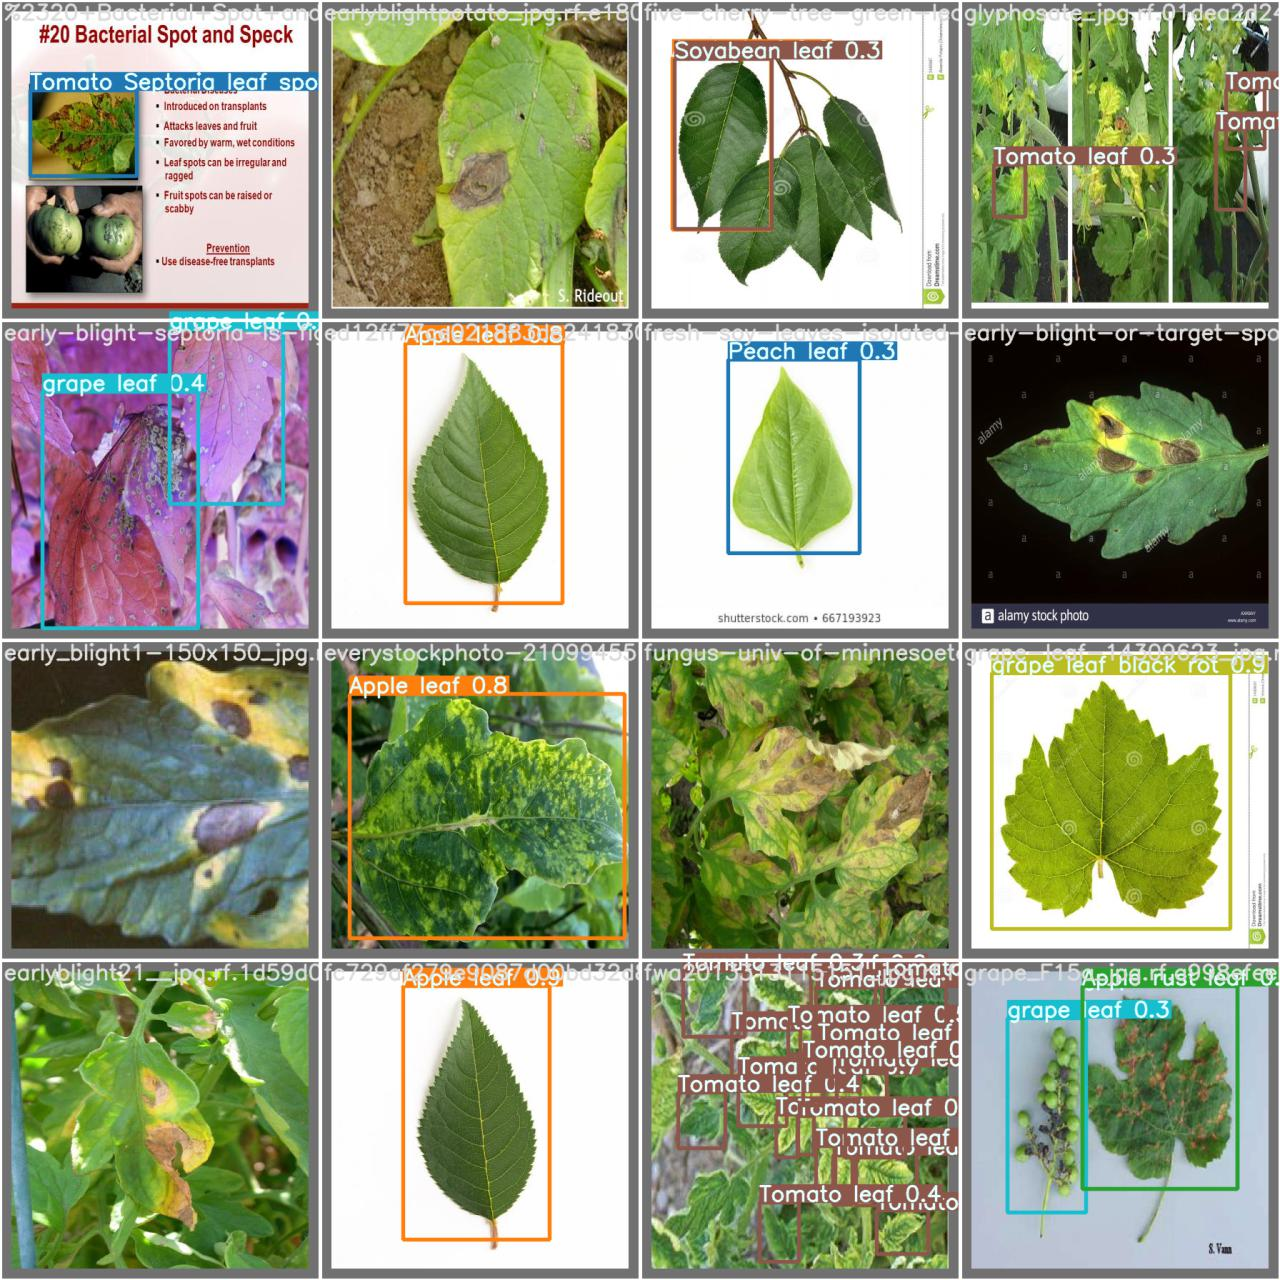

In [30]:
Image(filename=r'C:\Users\Yaromir\Desktop\dipv\yolov7\runs\train\exp\test_batch0_pred.jpg', width=1600)

In [30]:
os.chdir(r'C:\Users\Yaromir\Desktop\dipv\yolov7\runs\train\exp')

In [34]:
v7ap50 = pd.read_csv('results.csv') 

In [35]:
v7ap50

,0/99 0.887G 0.06912 0.01818 0.05115 0.1384 10 416 0.1132 0.0139 0.0002494 9.944e-05 0.1036 0.0321 0.09059
0,1/99 5.52G 0.0644 0.01943 0.04978 ...
1,2/99 5.21G 0.0621 0.02044 0.04903 ...
2,3/99 5.21G 0.06048 0.0206 0.04836 ...
3,4/99 5.25G 0.05834 0.02121 0.04736 ...
4,5/99 5.25G 0.05441 0.02171 0.04652 ...
...,...
94,95/99 5.62G 0.0326 0.01978 0.02394 ...
95,96/99 5.62G 0.03234 0.02024 0.02414 ...
96,97/99 5.62G 0.03228 0.01982 0.02359 ...
97,98/99 5.62G 0.03238 0.01996 0.02356 ...


### YOLOV8

In [4]:
os.chdir(r'C:\Users\Yaromir\Desktop\dipv\yolov8')

In [5]:
#обучение модели
%%time
!yolo task=detect \
mode=train \
model=yolov8n.pt \
data=data.yaml \
epochs=100 \
imgsz=416 \
batch=16 \
device=0

CPU times: total: 594 ms
Wall time: 30min 29s


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



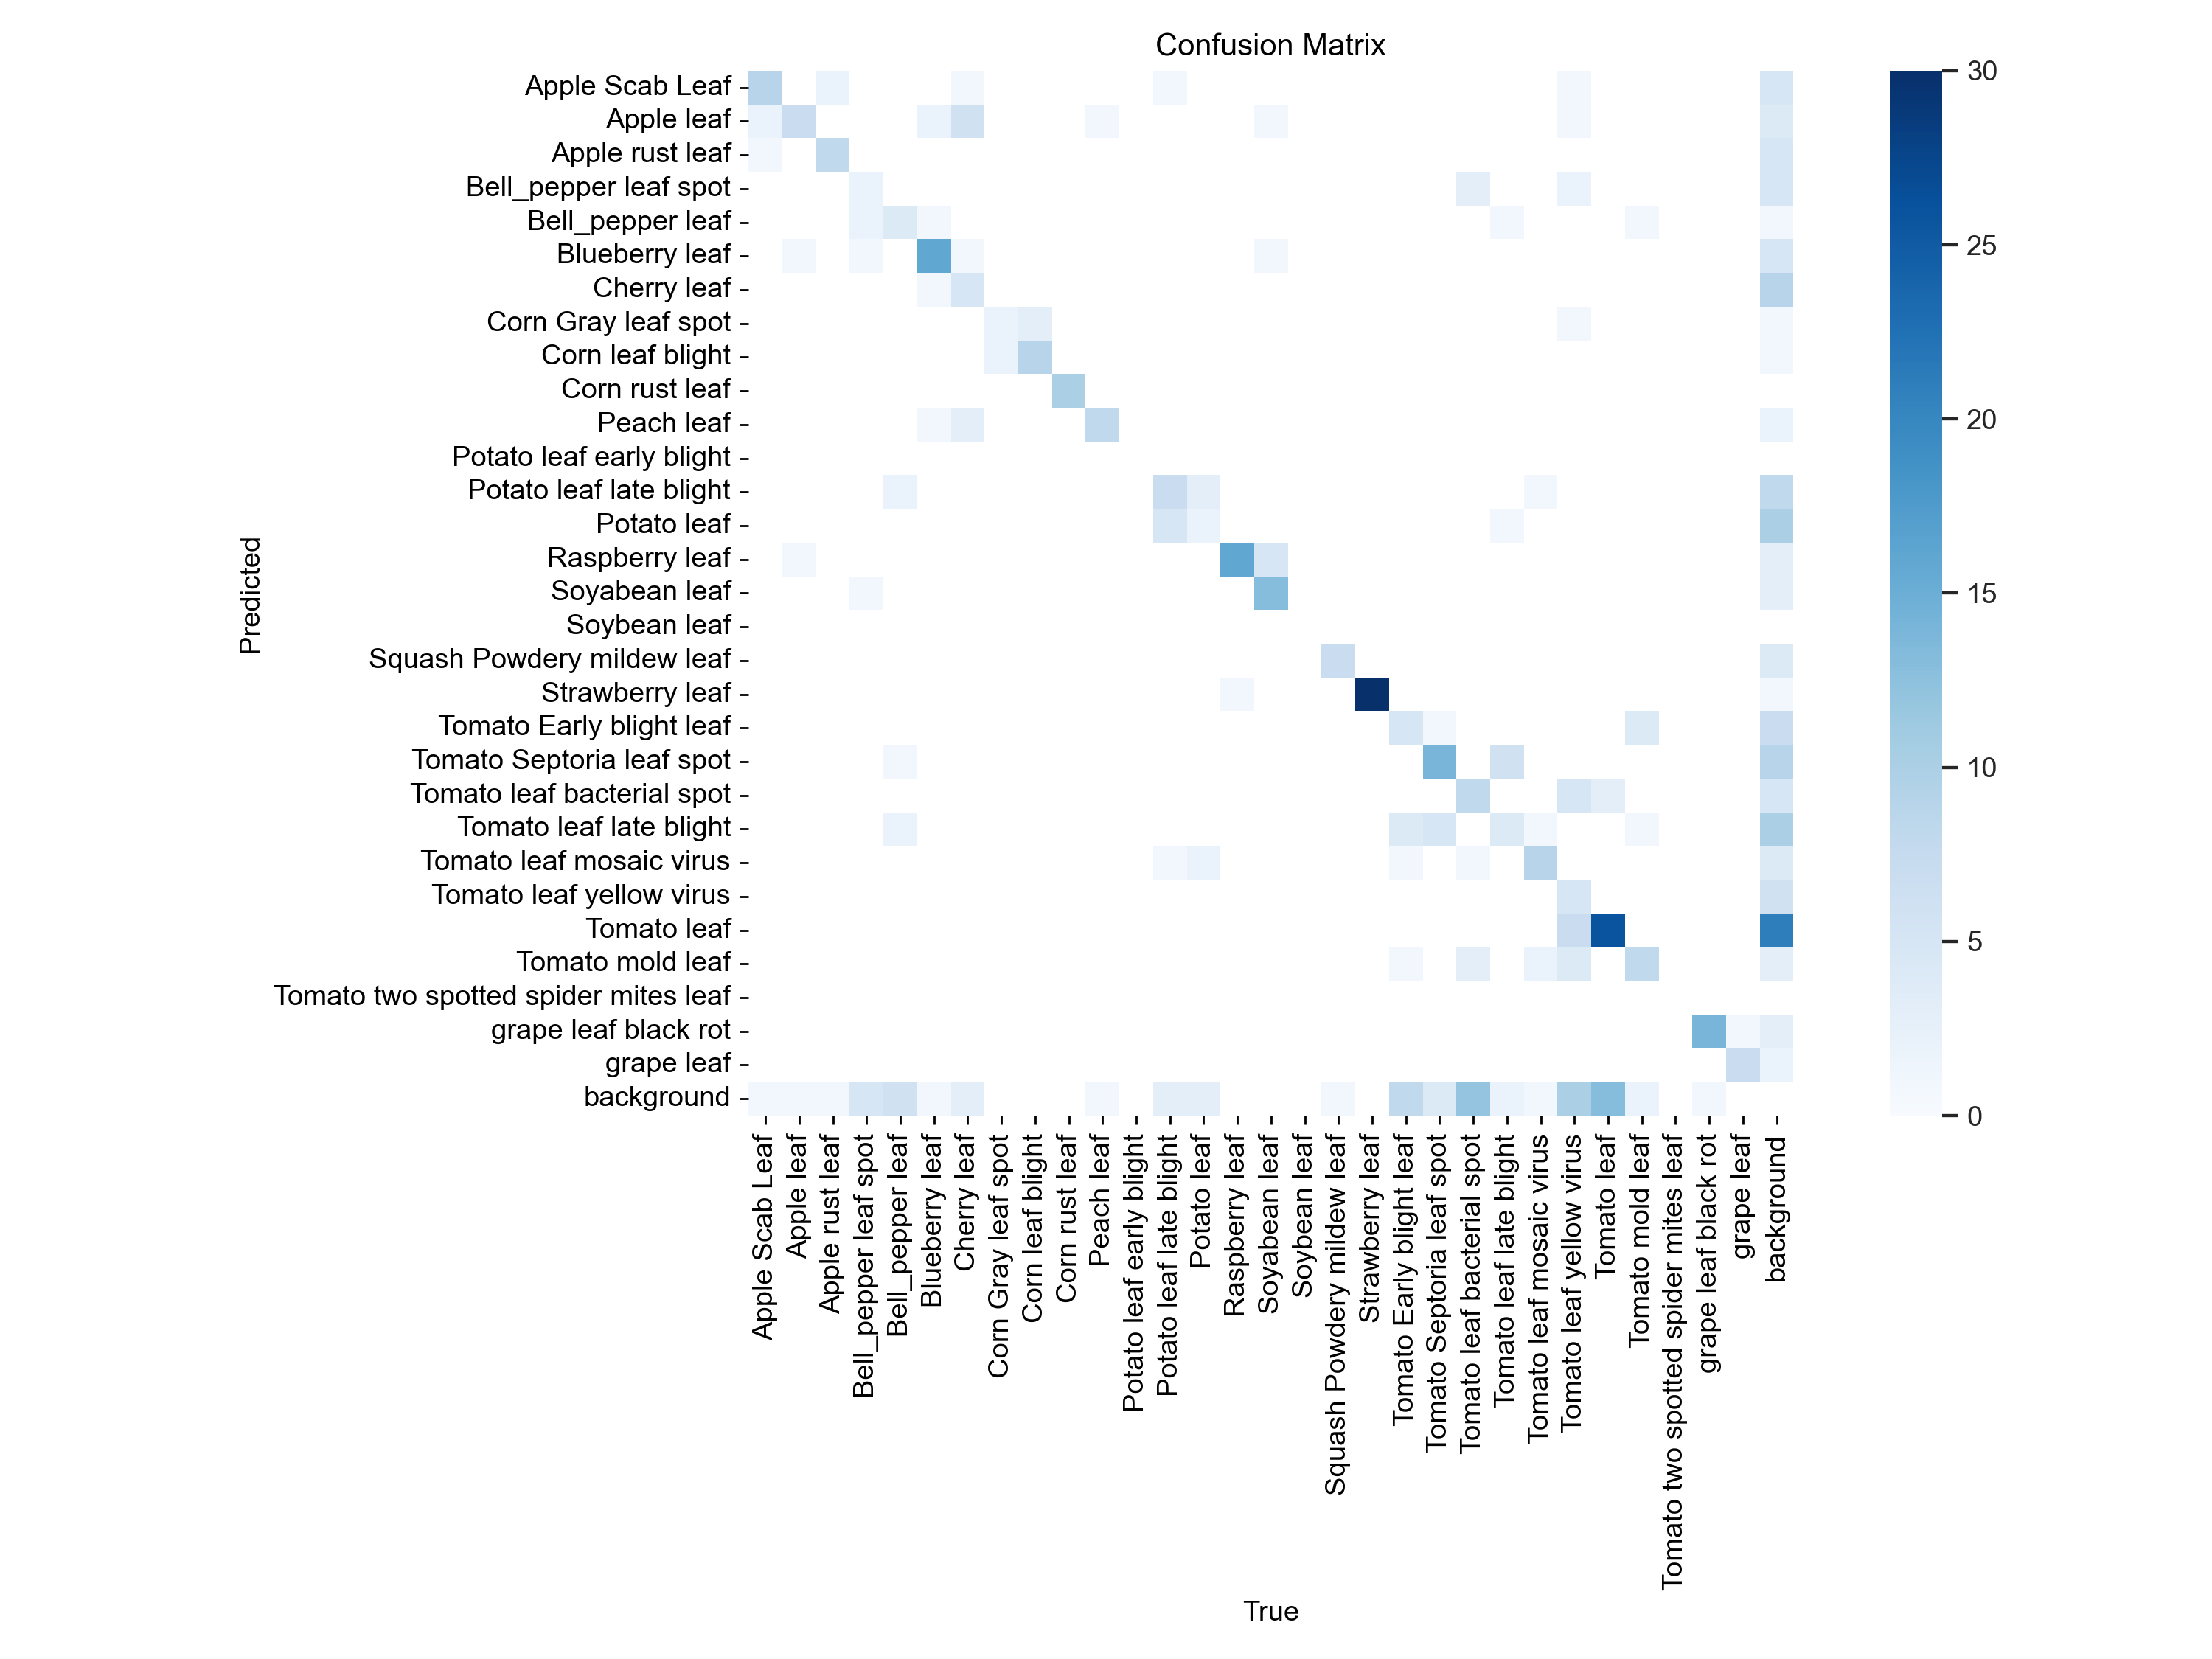

In [21]:
Image(filename=r'C:\Users\Yaromir\Desktop\dipv\yolov8\runs\detect\train4\confusion_matrix.png', width=1600)

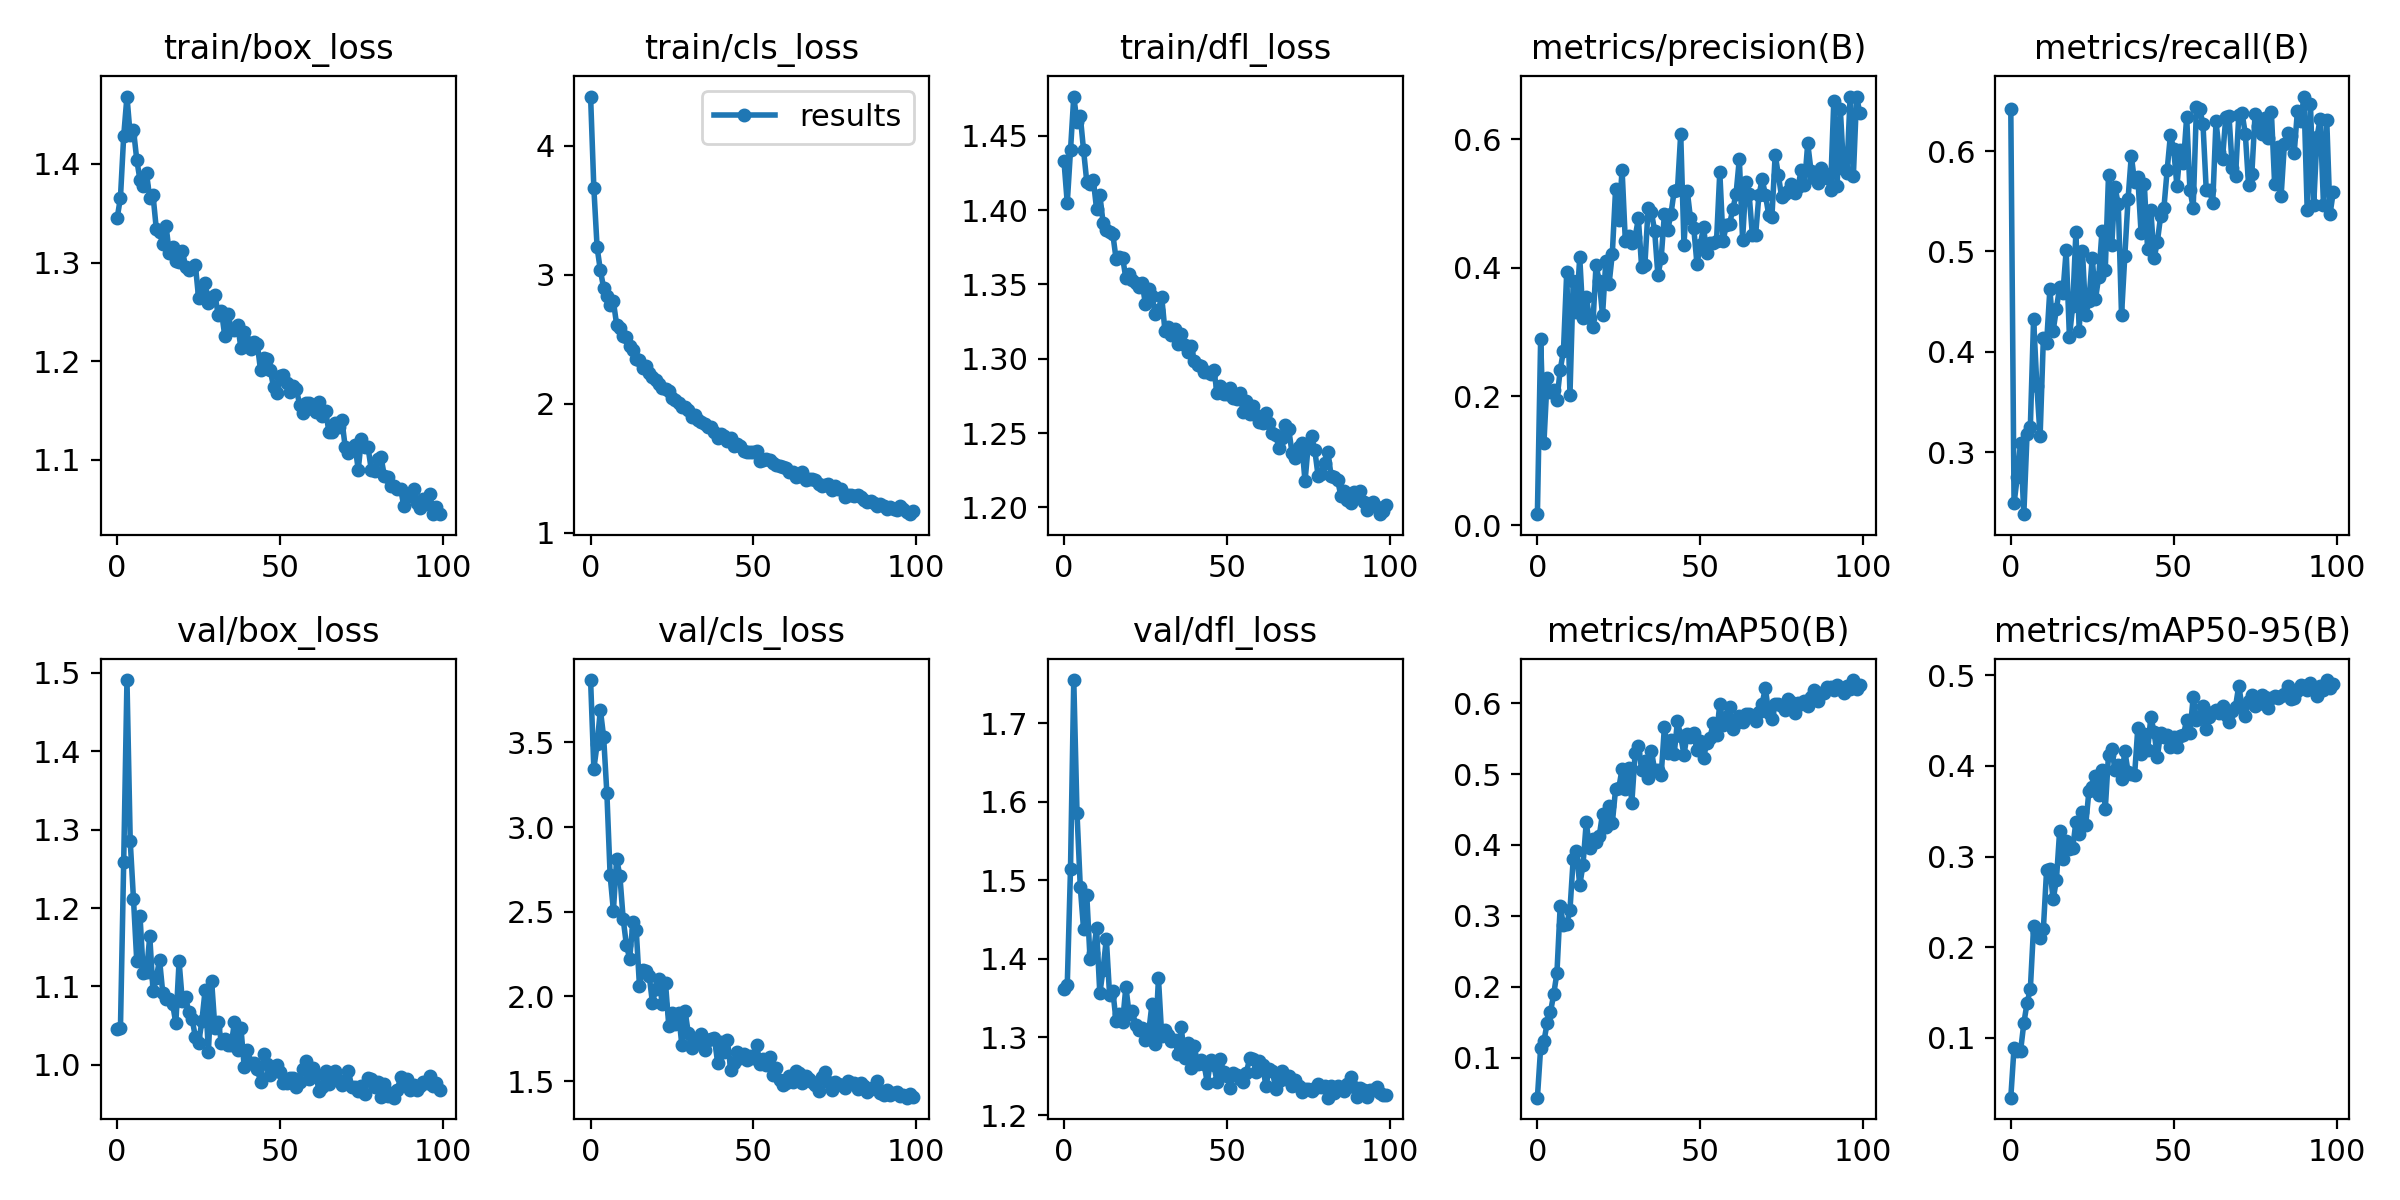

In [22]:
Image(filename=r'C:\Users\Yaromir\Desktop\dipv\yolov8\runs\detect\train4\results.png', width=1600)

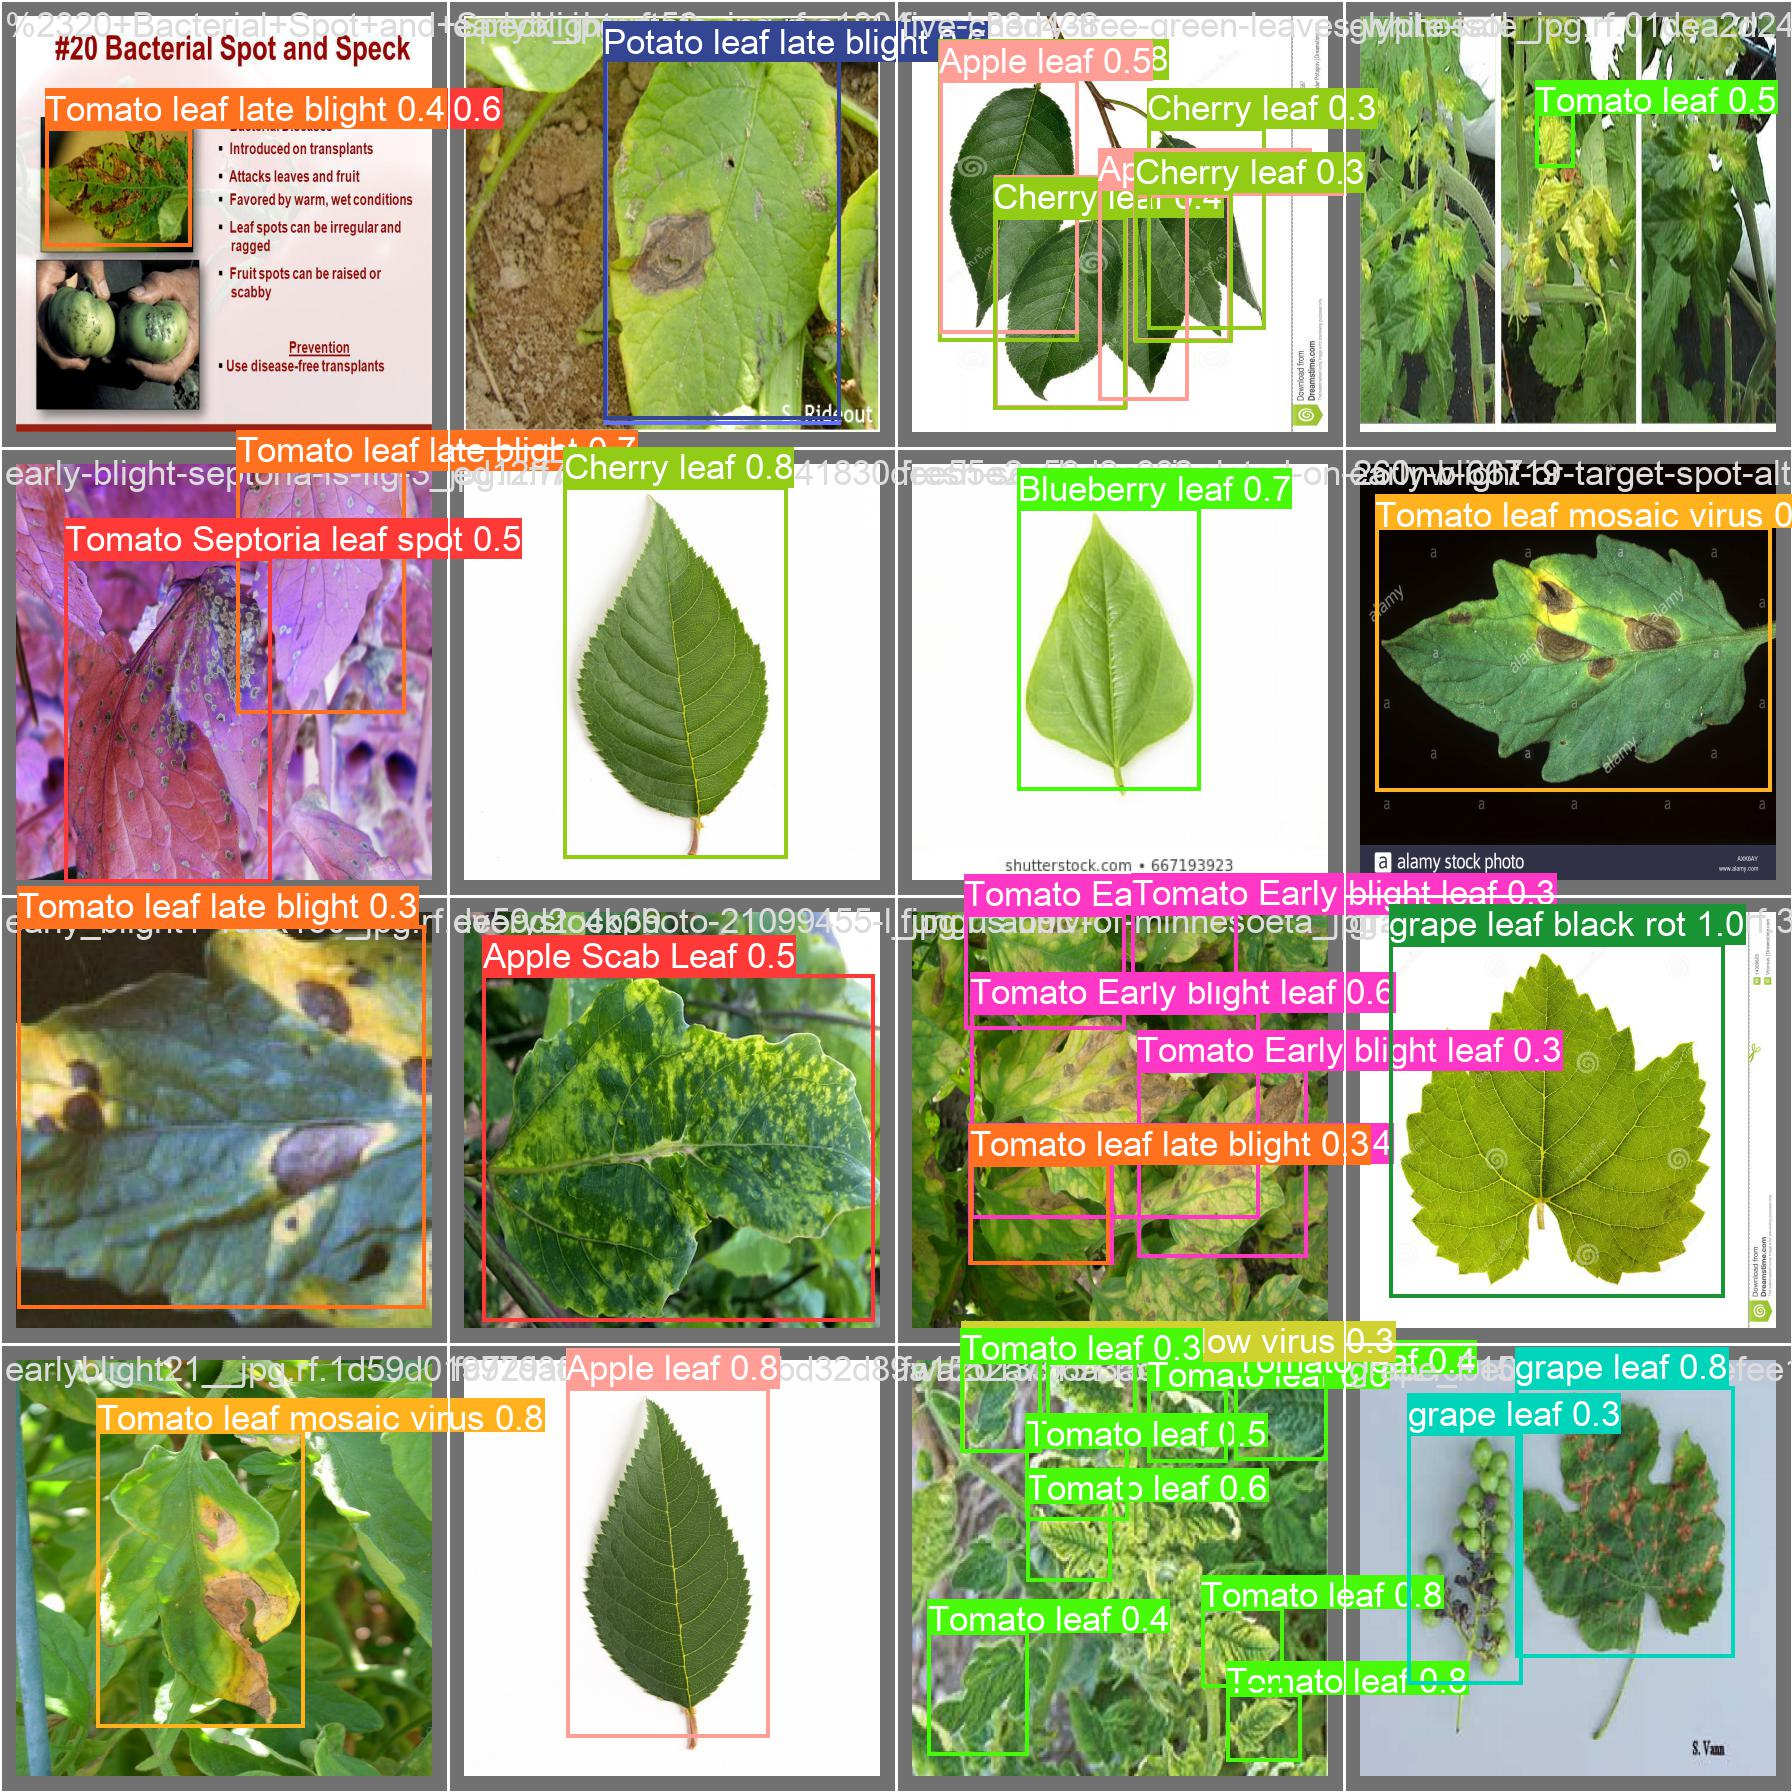

In [23]:
Image(filename=r'C:\Users\Yaromir\Desktop\dipv\yolov8\runs\detect\train4\val_batch0_pred.jpg', width=1600)

In [17]:
v8ap50 = pd.read_csv('results.csv') 

In [29]:
v8ap50

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,1.3453,4.3828,1.4329,0.01695,0.64246,0.04374,0.03398,1.04530,3.8689,1.3617,0.070205,0.003311,0.003311
1,1,1.3658,3.6729,1.4047,0.28914,0.24884,0.11395,0.08928,1.04650,3.3452,1.3658,0.040140,0.006578,0.006578
2,2,1.4285,3.2137,1.4402,0.12725,0.27547,0.12313,0.08503,1.25930,3.4895,1.5144,0.010008,0.009780,0.009780
3,3,1.4684,3.0344,1.4763,0.22846,0.30951,0.14893,0.08540,1.49080,3.6927,1.7549,0.009703,0.009703,0.009703
4,4,1.4289,2.9011,1.4592,0.20774,0.23805,0.16381,0.11603,1.28540,3.5339,1.5849,0.009703,0.009703,0.009703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1.0555,1.2064,1.2039,0.54733,0.63241,0.62374,0.48824,0.97630,1.4143,1.2320,0.000694,0.000694,0.000694
96,96,1.0653,1.1836,1.2004,0.66528,0.54637,0.62028,0.48345,0.98629,1.4150,1.2358,0.000595,0.000595,0.000595
97,97,1.0448,1.1596,1.1955,0.54253,0.63109,0.63244,0.49483,0.97300,1.4018,1.2292,0.000496,0.000496,0.000496
98,98,1.0519,1.1449,1.1973,0.66652,0.53705,0.62049,0.48588,0.97665,1.4218,1.2259,0.000397,0.000397,0.000397
